<h1 align='center'> <b> 📖 BOOK RECOMMENTION SYSTEM  📚</b> </h1>
<h1 align='center'> <b> 📕HỆ THỐNG ĐỀ XUẤT SÁCH 📘  </b> </h1>

![](https://api.time.com/wp-content/uploads/2021/11/featured-image.jpg?quality=85&w=1012&h=569&crop=1)

**Thành viên thực hiện**

* *20280007 - Võ Thái Bình*
* *20280010 - Phạm Bảo Cương*
* *20280050 - Huỳnh Bảo Khang*
* *20280058 - Đặng Yến Linh*

**Nội dung chính**

⭐Lời Nói Đầu

⭐Nội Dung Bài

        1. Loading library and dataset - Đọc thư viện và bộ dữ liệu.     
        2. Exploratory Data Analysis - Phân tích dữ liệu tổng quan.        
        3. Data Visualization - Trực quan hóa dữ liệu.
        4. Data Pre-processing - Tiền xử lý dữ liệu.  
        5. System Building - Xây dựng hệ thống.
             - POPULARITY BASED RECOMMENDATION SYSTEM
             - ITEM-BASED COLLABORATIVE FILTERING
             - USER-BASED COLLABORATIVE FILTERING
             - CONTENT-BASED COLLABORATIVE FILTERING

⭐Tổng Kết.

<h1 align='center'> <b> 🌻 LỜI NÓI ĐẦU 🌻</b> </h1>

<p align="justify">Sách không chỉ là những trang giấy có chữ in. Xuyên suốt lịch sử, sách là nơi ghi chép các sự kiện và là kho lưu trữ kiến thức chung của nhân loại. Nếu không có văn bản hoặc văn bản in, nền văn minh nhân loại sẽ không như ngày nay. Những nhà tư tưởng, nhà văn và những người có ảnh hưởng vĩ đại luôn là những người đọc sách. Họ dành phần lớn thời gian đọc sách để thu thập kiến thức mà sau này sẽ giúp họ thay đổi thế giới.

<p align="justify">Sách có rất nhiều thể loại, và mọi người đều đọc sách với sở thích , nhu cầu, mục đích không giống nhau. Do đó, hệ thống đề xuất là công cụ lọc thông tin mạnh mẽ có thể giúp chúng ta tận dụng nguồn dữ liệu dồi dào hiện có để giúp cho việc đưa ra lựa chọn những cuốn sách phù hợp với nhu cầu, sở thích của mỗi cá nhân một cách dễ dàng hơn.
Có hai lợi ích của việc sử dụng hệ thống đề xuất: Một mặt, nó có thể giảm lượng lớn công sức tìm kiếm sản phẩm của người dùng và giảm thiểu vấn đề quá tải thông tin. Mặt khác, nó có thể tăng giá trị kinh doanh cho các nhà cung cấp dịch vụ trực tuyến và trở thành nguồn doanh thu quan trọng.


In [ ]:
!git clone https://github.com/EtsuDaemon138/Book_Recommendation.git
!cp -a /content/Book_Recommendation/. /content

Cloning into 'Book_Recommendation'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [ ]:
!pip install requests --upgrade
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 33.6 MB/s 
     |████████████████████████████████| 384 kB 94.5 MB/s 
     |████████████████████████████████| 140 kB 57.6 MB/s 
     |████████████████████████████████| 58 kB 7.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


⭐Thiết lập môi trường và cài đặt thư viện cần thiết

# 1️⃣ **LOADING LIBRARY AND DATASET - Đọc thư viện và bộ dữ liệu**

Importing Libraries : Thêm những thư viện cần thiết

In [ ]:
#Calculation, visualizing and analysis libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import re

#Extract images
import google_images_download
from PIL import Image
import requests

#Pre-processing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

-	Pandas : Thư viện phục vụ các thao tác xử lý, phân tích dữ liệu,…
-	Numpy : Thư viện toán học hỗ trợ xử lí các dãy số, ma trận nhiều chiều,…
-   Random : Thư viện hỗ trợ phát sinh số ngẫu nhiên.
-	Matplotlib: Thư viễn hỗ trợ trực quan hóa dữ liệu.
-	Re : Thư viện biểu thức chính quy,  Regular Expression (RegEx).
-   google_images_download và PIL: thư viện cung cấp công cụ để tài ảnh từ Google image search và xử lý ảnh.
-	Sklearn : Thư viện hỗ trợ các thuật toán máy học.

⭐ thư viện  google_images_download ta phải thực hiện việc download và cài đặt module này thủ công.

In [ ]:
def get_image_url(key_word):
    response = google_images_download.googleimagesdownload()
    arguments = {"keywords":f"{key_word} the book amazon","limit":1,"print_urls":True,"no_download":True,"size":"medium","silent_mode":True}
    paths= response.download(arguments)
    images_paths = []
    for k, v in paths[0].items():
        images_paths += v
    return str(images_paths[0])

⭐Thiết lập hàm lấy hình ảnh từ internet qua tên quyển sách ( Nguồn ảnh: Google ).

Reading dataset: Đọc bộ dữ liệu

In [ ]:
books=pd.read_csv("/content/Books.csv")

In [ ]:
ratings=pd.read_csv("/content/Ratings.csv")

In [ ]:
users=pd.read_csv("/content/Users.csv")

Nguồn bộ dữ liệu : Kaggle
https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset

# 2️⃣ **EXPLORATORY DATA ANALYSIS  - Phân tích tổng quát dữ liệu**

<p align="justify">Được thu thập bởi Cai-Nicolas Ziegler từ cộng đồng Book-Crossing với sự cho phép của Ron Hornbaker, CTO của Humankind Systems. Chứa 278.858 người dùng (ẩn danh nhưng có thông tin nhân khẩu học) cung cấp 1.149.780 xếp hạng (rõ ràng/ẩn) về 271.379 cuốn sách.

<p align="justify">Tập dữ liệu Book-Crossing bao gồm 3 tệp:

🍁Users
<p align="justify">- Chứa người dùng. Lưu ý rằng ID người dùng ( User-ID) đã được ẩn danh và ánh xạ tới số nguyên. Dữ liệu nhân khẩu học được cung cấp ( Location, Age) nếu có. Mặt khác, các trường này chứa giá trị NULL.

🍁Books
<p align="justify">- Sách được xác định bởi ISBN tương ứng của chúng. ISBN không hợp lệ đã bị xóa khỏi tập dữ liệu. Ngoài ra, một số thông tin dựa trên nội dung được cung cấp ( Book-Title, Book-Author, Year-Of-Publication, Publisher), được lấy từ Amazon Web Services. Lưu ý rằng trong trường hợp có nhiều tác giả, chỉ tác giả đầu tiên được cung cấp.

🍁Ratings
<p align="justify">- Chứa thông tin xếp hạng sách. Xếp hạng ( Book-Rating) là rõ ràng, được biểu thị trên thang điểm từ 1-10 (giá trị càng cao biểu thị sự đánh giá cao hơn) hoặc ẩn, được biểu thị bằng 0.

In [ ]:
# showing first 5-line of dataset books
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                   Publisher  
0    Mark P. O. Morford                 2002     Oxford University Press  
1  Richard Bruce Wright                 2001       HarperFlamingo Canada  
2          Carlo D'Este                 1991             HarperPerennial  
3      Gina Bari Kolata                 1999        Farrar Straus Giroux  
4       E. J. W. Barber                 1999  W. W. Norton &amp; Company

In [ ]:
# showing first 5-line of dataset ratings
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            5
1   276726  0155061224            5
2   276727  0446520802            9
3   276729  052165615X            3
4   276729  0521795028            6

In [ ]:
# showing first 5-line of dataset users
users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [ ]:
# number of rows and columns of the 3 dataset
print("Books Shape: " ,books.shape )
print("Ratings Shape: " ,ratings.shape )
print("Users Shape: " ,users.shape )

Books Shape:  (271360, 5)
Ratings Shape:  (1149780, 3)
Users Shape:  (278858, 3)


In [ ]:
#Calculate sum null value
print("Any null values in Books:\n" ,books.isnull().sum())

Any null values in Books:
 ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64


In [ ]:
print("Any null values in Users:\n",users.isnull().sum())

Any null values in Users:
 User-ID          0
Location         0
Age         110762
dtype: int64


In [ ]:
print("Any null values in Ratings:\n ",ratings.isnull().sum())

Any null values in Ratings:
  User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


# 3️⃣ **DATA VISUALIZATION - Trực quan hóa dữ liệu**


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


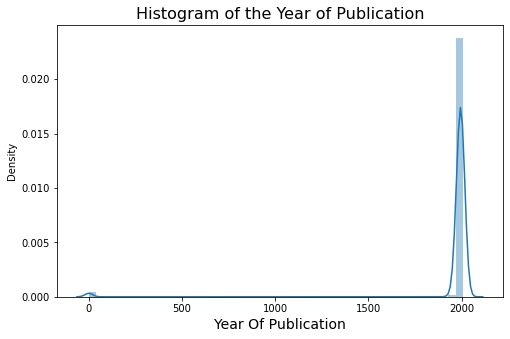

In [ ]:
fig=plt.figure(figsize=(8,5))
#y1 = books[books['Year-Of-Publication'] >= 1960]
#y1 = y1[y1['Year-Of-Publication'] <= 2005]
sns.distplot(books['Year-Of-Publication'])
plt.xlabel('Year Of Publication',size=14)
plt.title('Histogram of the Year of Publication',size=16)
plt.show()

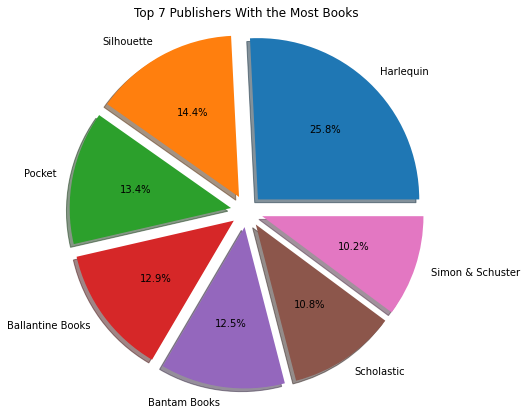

In [ ]:
my_dict=(books['Publisher'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'Harlequin','Silhouette','Pocket','Ballantine Books','Bantam Books','Scholastic','Simon & Schuster'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4],
         count['count'].iloc[5],count['count'].iloc[6]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1 )
fig1 , ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Publishers With the Most Books")
ax1.axis ('equal')
plt.show()



Để có một cái nhìn tổng quát về lượt đánh giá trong bộ dữ liệu ta tiến hành vẽ đồ thị của cột đánh giá.

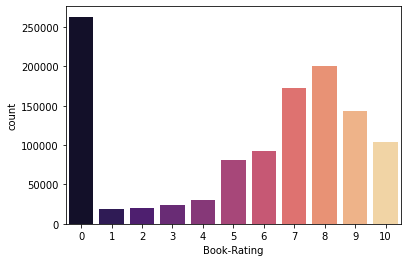

In [ ]:
sns.countplot(data=ratings , x='Book-Rating', palette='magma')

⭐ Từ đồ thị ta thấy bộ dữ liệu ta có tồn tại dữ liệu 0 ( Không hợp lệ) nên ta tiến hành bước tiền xử lí dữ liệu.

# 4️⃣  **DATA PRE-PROCESSING - Tiền xử lý dữ liệu**

Vì trong bộ dữ liệu ratings có những quyển sách mà ISBN của chúng không có trong bộ dữ liệu books (không hợp lệ) nên ta sẽ tiến hành loại bỏ chúng.

In [ ]:
books_data=books.merge(ratings,on="ISBN")
books_data.shape

(1031136, 7)

⭐Bộ dữ liệu sau khi loại bỏ dữ liệu không hợp lệ gồm có 1031136 dòng và 7 cột. Lúc này ISBN giảm từ 1149780 dòng xuống 1031136 dòng.

In [ ]:
books_data.head()

ISBN           Book-Title           Book-Author  Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                 2002   
1  0002005018         Clara Callan  Richard Bruce Wright                 2001   
2  0002005018         Clara Callan  Richard Bruce Wright                 2001   
3  0002005018         Clara Callan  Richard Bruce Wright                 2001   
4  0002005018         Clara Callan  Richard Bruce Wright                 2001   

                 Publisher  User-ID  Book-Rating  
0  Oxford University Press        2            8  
1    HarperFlamingo Canada        8            5  
2    HarperFlamingo Canada    11400            9  
3    HarperFlamingo Canada    11676            8  
4    HarperFlamingo Canada    41385            7

⭐Từ bước trực quan hóa dữ liệu thấy bộ dữ liệu ratings có dữ liệu không hợp lệ nên ta tiến hành bước xử lý tiếp theo.

In [ ]:
df=books_data.copy()
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.drop(columns=["ISBN","Year-Of-Publication"],axis=1,inplace=True)
df.drop(index=df[df["Book-Rating"]==0].index,inplace=True)
df["Book-Title"]=df["Book-Title"].apply(lambda x: re.sub("[\W_]+"," ",x).strip())
df.head(10)

Book-Title           Book-Author                Publisher  \
0  Classical Mythology    Mark P. O. Morford  Oxford University Press   
1         Clara Callan  Richard Bruce Wright    HarperFlamingo Canada   
2         Clara Callan  Richard Bruce Wright    HarperFlamingo Canada   
3         Clara Callan  Richard Bruce Wright    HarperFlamingo Canada   
4         Clara Callan  Richard Bruce Wright    HarperFlamingo Canada   
5         Clara Callan  Richard Bruce Wright    HarperFlamingo Canada   
6         Clara Callan  Richard Bruce Wright    HarperFlamingo Canada   
7         Clara Callan  Richard Bruce Wright    HarperFlamingo Canada   
8         Clara Callan  Richard Bruce Wright    HarperFlamingo Canada   
9         Clara Callan  Richard Bruce Wright    HarperFlamingo Canada   

   User-ID  Book-Rating  
0        2            8  
1        8            5  
2    11400            9  
3    11676            8  
4    41385            7  
5    67544            8  
6    85526            7  
7    96054            9  
8   116866            9  
9   123629            9

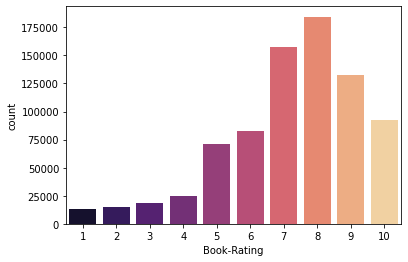

In [ ]:
sns.countplot(data=df , x='Book-Rating', palette='magma')

⭐ Dataframe mới sau khi đã xử lý làm sạch dữ liệu bỏ đi những cột không cần thiết. Từ đây ta thu được bộ dataframe chính là df. Từ đồ thị ta thấy đồ thị dữ liệu lượt đánh giá tuân theo phân phối chuẩn có độ lệch trái. Cho thấy dữ liệu tập trung chủ yếu ở xung quanh lượt đánh giá 8 với tần suất xuất hiện cao nhất.

# 5️⃣ **SYSTEM BUILDING - Xây dựng hệ thống**

Các hệ thống đề xuất dựa trên mức độ phổ biến dựa trên xếp hạng các mặt hàng của tất cả người dùng.

Hệ thống đề xuất dựa trên mức độ phổ biến hoạt động theo xu hướng. Về cơ bản, nó sử dụng các mặt hàng đang là xu hướng hiện nay.

## 📚POPULARITY BASED RECOMMENDATION SYSTEM 📚

In [ ]:
def popular_books(df,n=100):
    rating_count=df.groupby("Book-Title").count()["Book-Rating"].reset_index()
    rating_count.rename(columns={"Book-Rating":"NumberOfVotes"},inplace=True)
    rating_average=df.groupby("Book-Title")["Book-Rating"].mean().reset_index()
    rating_average.rename(columns={"Book-Rating":"AverageRatings"},inplace=True)

    popularBooks=rating_count.merge(rating_average,on="Book-Title")

    def weighted_rate(x):
        v=x["NumberOfVotes"]
        R=x["AverageRatings"]

        return ((v*R) + (m*C)) / (v+m)

    C=popularBooks["AverageRatings"].mean()
    m=popularBooks["NumberOfVotes"].quantile(0.90)

    popularBooks=popularBooks[popularBooks["NumberOfVotes"] >=250]
    popularBooks["Popularity"]=popularBooks.apply(weighted_rate,axis=1)
    popularBooks=popularBooks.sort_values(by="Popularity",ascending=False)
    return popularBooks[["Book-Title","NumberOfVotes","AverageRatings","Popularity"]].reset_index(drop=True).head(n)

⭐Công thức trên được sử dụng để tính 250 đầu sách được xếp hạng cao nhất. Công thức này cung cấp một 'ước tính Bayes' đúng, có tính đến số phiếu bầu mà mỗi tựa sách đã nhận được, số phiếu bầu tối thiểu cần thiết để có tên trong danh sách và số phiếu bầu trung bình cho tất cả các tựa sách:

xếp hạng có trọng số (WR) = ((v × R)+ (m × C))/(v+m)

Ở đây:

R = trung bình cho sách (trung bình) = (xếp hạng)

v = số lượt bình chọn cho sách = (phiếu)

m = số phiếu tối thiểu cần thiết để được liệt kê trong danh sách Top 250 (hiện tại là 25.000)

C = bình chọn trung bình trên toàn bộ báo cáo

⭐ M nhóm đã sử dụng 90% làm giới hạn, nghĩa là để một cuốn sách xuất hiện trong danh sách, nó phải có nhiều phiếu bầu hơn ít nhất 90%.

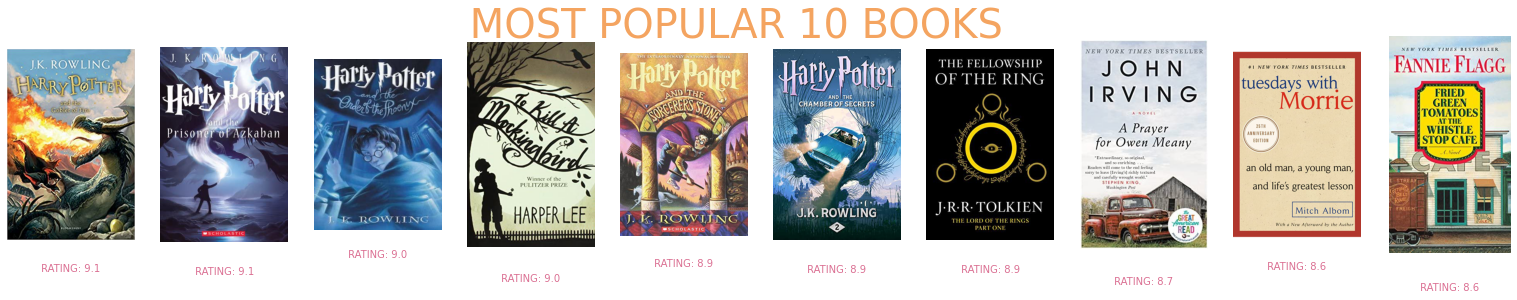

In [ ]:
n=10
top=pd.DataFrame(popular_books(df,n))
fig,ax=plt.subplots(1,n,figsize=(27,4))
fig.suptitle(f" MOST POPULAR {n} BOOKS ",fontsize=40,color="sandybrown")
for i in range(n):
    title=top["Book-Title"].tolist()[i]
    url = get_image_url(title)
    img=Image.open(requests.get(url,stream=True).raw)
    ax[i].imshow(img)
    ax[i].axis("off")
    ax[i].set_title(" RATING: {} ".format(round(df[df["Book-Title"]==top["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="palevioletred",fontsize=10)

⭐ Kết hợp các hàm ta xây dựng được hệ thống đề xuất top 10 cuốn sách phổ biến.

📚 **Tiếp theo ta xây dựng các tính năng đặc thù khác phục vụ cho việc đề xuất tốt hơn.**

 Nhìn chung có 2 loại hệ thống đề xuất chính : Lọc dựa trên nội dung (content based) và lọc cộng tác (collaborative filtering).

 Sự khác biệt chính giữa mỗi loại, có thể được tổng hợp theo loại của tuyên bố mà người tiêu dùng có thể đưa ra. Chẳng hạn, mô hình chính của hệ thống đề xuất trên nội dung được điều khiển bởi tuyên bố: "Chỉ cho tôi nhiều hơn những gì tôi đã thích trước đây. " Các hệ thống dựa trên nội dung cố gắng tìm ra những khía cạnh yêu thích của người dùng đối với một mặt hàng là gì và sau đó đưa ra đề xuất về các mặt hàng cùng chia sẻ những khía cạnh đó.

 Lọc cộng tác dựa trên câu nói của người dùng , "Nói cho tôi biết những gì phổ biến với các hàng xóm của tôi vì tôi cũng có thể thích nó." Kỹ thuật lọc cộng tác tìm thấy các nhóm người dùng tương tự và cung cấp các đề xuất dựa trên thị hiếu tương tự trong nhóm đó. Nói tóm lại, nó giả định rằng một người sử dụng có thể quan tâm đến những gì các người dùng tương tự khác quan tâm.

## 📚 **ITEM-BASED COLLABORATIVE FILTERING** 📚


Lọc các quyển sách bằng phương pháp lọc cộng tác dựa trên các sản phẩm. Trong phương pháp này,  hệ tư vấn tìm ra các sản phẩm để giới thiệu đến người dùng bằng cách tìm ra sự tương đồng giữa các sản phẩm qua hành vi của người dùng. Ví dụ, một người dùng cụ thể thích một tập hợp các sản phẩm thì tất cả các sản phẩm đó được coi là tương đồng với nhau.


In [ ]:
def item_based(bookTitle):
    bookTitle=str(bookTitle)
    n= 5

    if bookTitle in df["Book-Title"].values:
        fig,ax=plt.subplots(1,n,figsize=(27,6))
        rating_count=pd.DataFrame(df["Book-Title"].value_counts())
        rare_books=rating_count[rating_count["Book-Title"]<=200].index
        common_books=df[~df["Book-Title"].isin(rare_books)]

        if bookTitle in rare_books:
             #number of book recommendation
            most_common=pd.Series(common_books["Book-Title"].unique()).sample(n).values
            print("No Recommendations for this Book ☹️ \n ")
            fig.suptitle(f"You May Try",fontsize=40,color="coral")
            for i in range(n):
                title = most_common[i]
                url = get_image_url(title)
                img=Image.open(requests.get(url,stream=True).raw)
                ax[i].imshow(img)
                ax[i].axis("off")
                ax[i].set_title("RATING: {} ".format(round(df[df["Book-Title"]== most_common[i]]["Book-Rating"].mean(),1)),y=-0.20,color="palevioletred",fontsize=20)

        else:
            common_books_pivot=common_books.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
            title=common_books_pivot[bookTitle]
            recommendation_df=pd.DataFrame(common_books_pivot.corrwith(title).sort_values(ascending=False)).reset_index(drop=False)

            if bookTitle in [title for title in recommendation_df["Book-Title"]]:
                recommendation_df=recommendation_df.drop(recommendation_df[recommendation_df["Book-Title"]==bookTitle].index[0])

            less_rating=[]
            for i in recommendation_df["Book-Title"]:
                if df[df["Book-Title"]==i]["Book-Rating"].mean() < 5:
                    less_rating.append(i)
            if recommendation_df.shape[0] - len(less_rating) > 5:
                recommendation_df=recommendation_df[~recommendation_df["Book-Title"].isin(less_rating)]

            recommendation_df=recommendation_df[0:n]
            recommendation_df.columns=["Book-Title","Correlation"]

            fig.suptitle("WOULD YOU LIKE to TRY THESE BOOKS?",fontsize=40,color="deepskyblue")
            for i in range(len(recommendation_df["Book-Title"].tolist())):
                title=recommendation_df["Book-Title"].tolist()[i]
                url = get_image_url(title)
                img=Image.open(requests.get(url,stream=True).raw)
                ax[i].imshow(img)
                ax[i].axis("off")
                ax[i].set_title("RATING:{}".format(round(df[df["Book-Title"]==recommendation_df["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="palevioletred",fontsize=22)
    else:
        print("❌ COULD NOT FIND ❌")

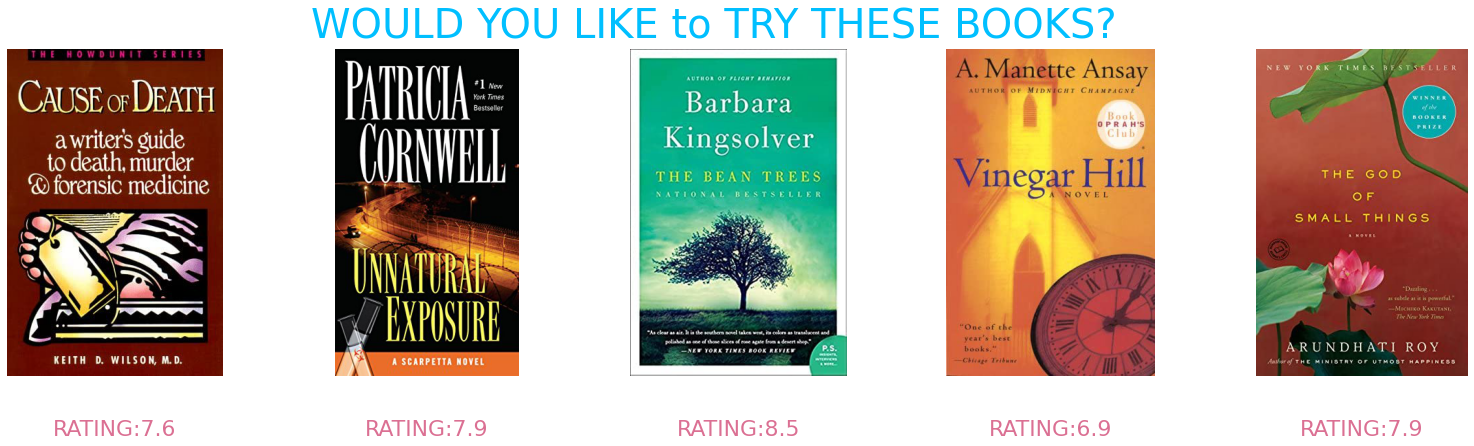

In [ ]:
item_based("The Da Vinci Code")

No Recommendations for this Book ☹️ 
 


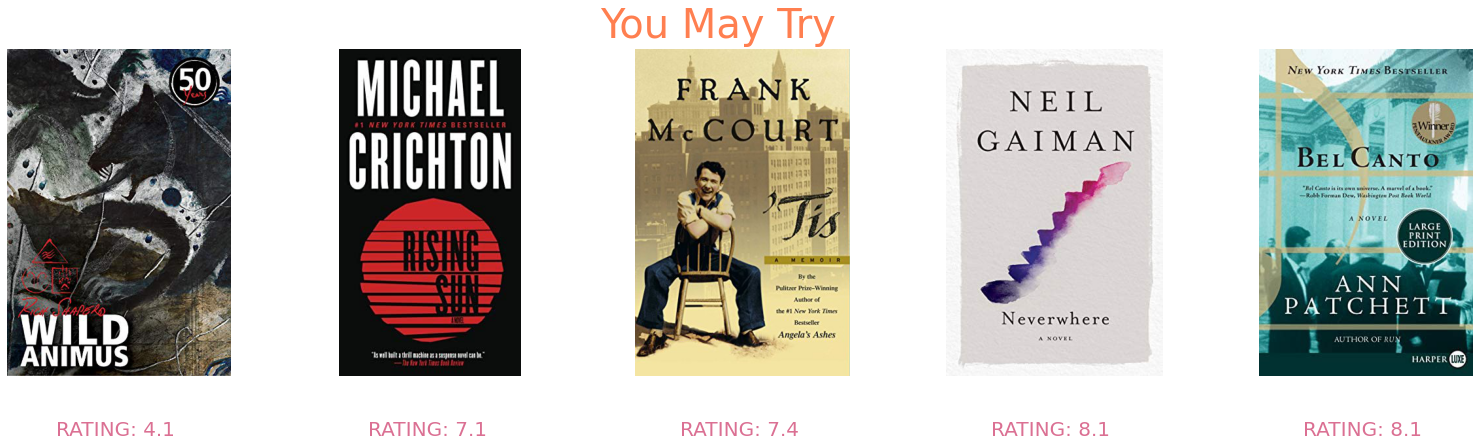

In [ ]:
item_based("The Snow Garden")

In [ ]:
item_based("Khoa Hoc Du Lieu")

❌ COULD NOT FIND ❌


## 📚 **CONTENT-BASED COLLABORATIVE FILTERING** 📚

Lọc các quyển sách bằng phương pháp lọc công tác dựa trên nội dung. Lọc dựa trên nội dung sử dụng các điểm tương đồng trong sản phẩm, dịch vụ, cũng như thông tin tích lũy được về người dùng để đưa ra đề xuất các sản phẩm khác tương tự như nội dung người dùng thích, dựa trên các thao tác trước đó hoặc dựa trên đặc tính của sản phẩm.

In [ ]:
def content_based(bookTitle):
    bookTitle=str(bookTitle)
    n=5
    if bookTitle in df["Book-Title"].values:
        rating_count=pd.DataFrame(df["Book-Title"].value_counts())
        rare_books=rating_count[rating_count["Book-Title"]<=200].index
        common_books=df[~df["Book-Title"].isin(rare_books)]

        if bookTitle in rare_books:
            most_common=pd.Series(common_books["Book-Title"].unique()).sample(n).values
            print("No Recommendations for this Book ☹️ \n ")
            fig,ax=plt.subplots(1,n,figsize=(27,6))
            fig.suptitle(f"You May Try",fontsize=40,color="coral")
            for i in range(n):
                title = most_common[i]
                url = get_image_url(title)
                img=Image.open(requests.get(url,stream=True).raw)
                ax[i].imshow(img)
                ax[i].axis("off")
                ax[i].set_title("RATING: {} ".format(round(df[df["Book-Title"]== most_common[i]]["Book-Rating"].mean(),1)),y=-0.20,color="palevioletred",fontsize=20)
        else:
            common_books=common_books.drop_duplicates(subset=["Book-Title"])
            common_books.reset_index(inplace=True)
            common_books["index"]=[i for i in range(common_books.shape[0])]
            targets=["Book-Title","Book-Author","Publisher"]
            common_books["all_features"] = [" ".join(common_books[targets].iloc[i,].values) for i in range(common_books[targets].shape[0])]
            vectorizer=CountVectorizer()
            common_booksVector=vectorizer.fit_transform(common_books["all_features"])
            similarity=cosine_similarity(common_booksVector)
            index=common_books[common_books["Book-Title"]==bookTitle]["index"].values[0]
            similar_books=list(enumerate(similarity[index]))
            similar_booksSorted=sorted(similar_books,key=lambda x:x[1],reverse=True)[1:n+1]
            books=[]
            for i in range(len(similar_booksSorted)):

                books.append(common_books[common_books["index"]==similar_booksSorted[i][0]]["Book-Title"].item())

            fig,ax=plt.subplots(1,len(books),figsize=(27,5))
            fig.suptitle("YOU MAY ALSO LIKE THESE BOOKS",fontsize=40,color="deepskyblue")
            for i in range(len(books)):
                title=books[i]
                url = get_image_url(title)
                img=Image.open(requests.get(url,stream=True).raw)
                ax[i].imshow(img)
                ax[i].axis("off")
                ax[i].set_title("RATING: {}".format(round(df[df["Book-Title"]==books[i]]["Book-Rating"].mean(),1)),y=-0.20,color="palevioletred",fontsize=22)
                fig.show()

    else:
        print("❌ COULD NOT FIND ❌")

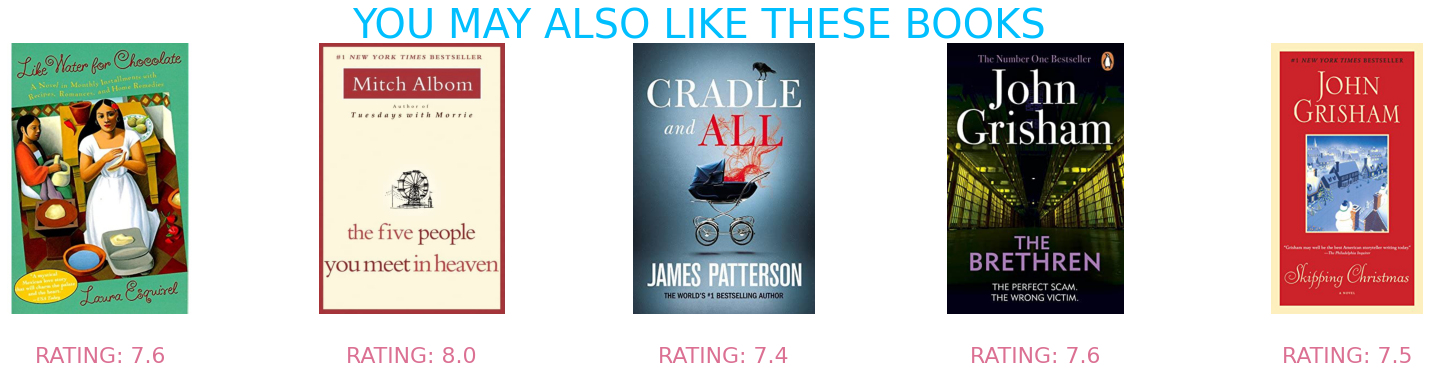

In [ ]:
content_based("Tuesdays with Morrie An Old Man a Young Man and Life s Greatest Lesson")

No Recommendations for this Book ☹️ 
 


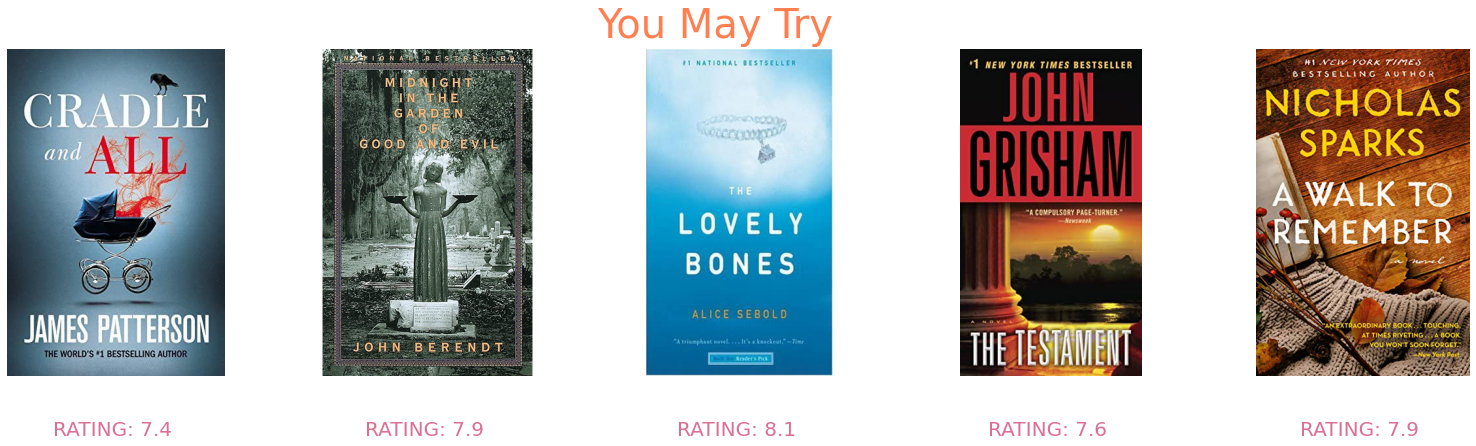

In [ ]:
content_based("A Soldier of the Great War")

In [ ]:
content_based("Dai Hoc Khoa Hoc Tu Nhien")

❌ COULD NOT FIND ❌


## 📚 **USER-BASED COLLABORATIVE FILTERING** 📚

Lọc các quyển sách bằng phương pháp lọc cộng tác dựa trên một người đọc sử dụng sự tương đồng giữa các người đọc để dự đoán sở thích của người đọc từ đó đưa ra đề xuất.

In [ ]:
# Drop users who vote less than 100 times.
new_df=df[df['User-ID'].map(df['User-ID'].value_counts()) > 100]
users_pivot=new_df.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
users_pivot.fillna(0,inplace=True)

In [ ]:
def users_choice(id):

    users_fav=new_df[new_df["User-ID"]==id].sort_values(["Book-Rating"],ascending=False)[0:5]
    return users_fav

In [ ]:
def common(new_df,user,user_id):
    x=new_df[new_df["User-ID"]==user_id]
    recommend_books=[]
    user=list(user)
    for i in user:
        y=new_df[(new_df["User-ID"]==i)]
        books=y.loc[~y["Book-Title"].isin(x["Book-Title"]),:]
        books=books.sort_values(["Book-Rating"],ascending=False)[0:5]
        recommend_books.extend(books["Book-Title"].values)

    return recommend_books[0:5]

In [ ]:
def user_based(new_df,id):
    if id not in new_df["User-ID"].values:
        print("❌ User NOT FOUND ❌")


    else:
        index=np.where(users_pivot.index==id)[0][0]
        similarity=cosine_similarity(users_pivot)
        similar_users=list(enumerate(similarity[index]))
        similar_users = sorted(similar_users,key = lambda x:x[1],reverse=True)[0:5]

        user_rec=[]

        for i in similar_users:
                data=df[df["User-ID"]==users_pivot.index[i[0]]]
                user_rec.extend(list(data.drop_duplicates("User-ID")["User-ID"].values))

    return user_rec

🟦 USER: 13552 


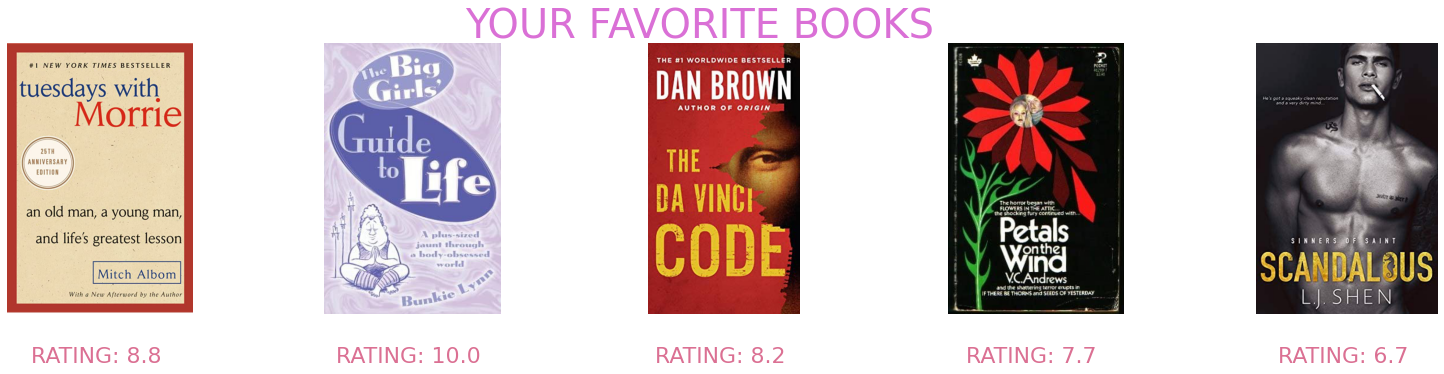

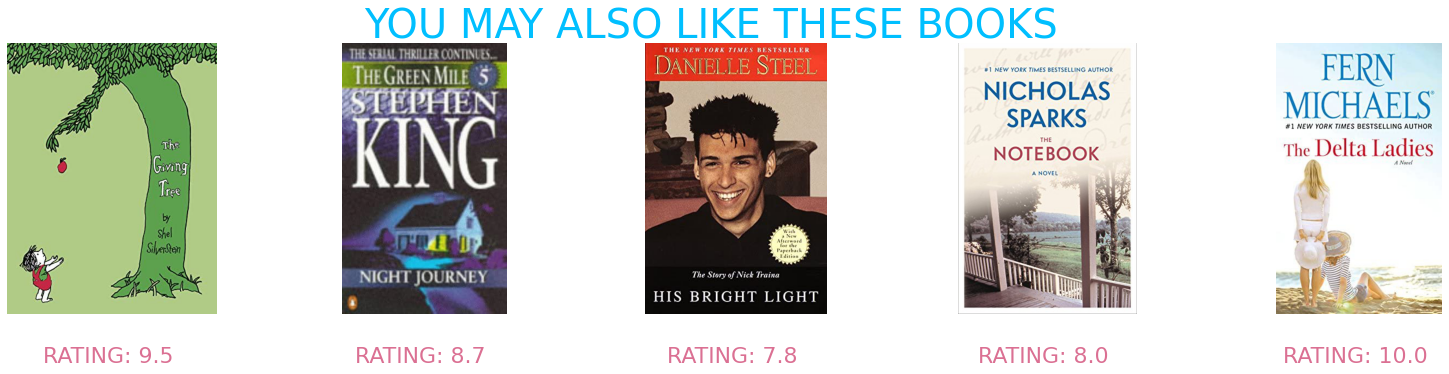

In [ ]:
user_id=random.choice(new_df["User-ID"].values)
user_choice_df=pd.DataFrame(users_choice(user_id))
user_favorite=users_choice(user_id)
n=len(user_choice_df["Book-Title"].values)
print("🟦 USER: {} ".format(user_id))

fig,ax=plt.subplots(1,n,figsize=(27,5))
fig.suptitle("YOUR FAVORITE BOOKS",fontsize=40,color="orchid")

for i in range(n):
        title=user_choice_df["Book-Title"].tolist()[i]
        url = get_image_url(title)
        img=Image.open(requests.get(url,stream=True).raw)
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title("RATING: {} ".format(round(new_df[new_df["Book-Title"]==user_choice_df["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="palevioletred",fontsize=22)

user_based_rec=user_based(new_df,user_id)
books_for_user=common(new_df,user_based_rec,user_id)
books_for_userDF=pd.DataFrame(books_for_user,columns=["Book-Title"])

fig,ax=plt.subplots(1,5,figsize=(27,5))
fig.suptitle("YOU MAY ALSO LIKE THESE BOOKS",fontsize=40,color="deepskyblue")
for i in range(5):
    title=books_for_userDF["Book-Title"].tolist()[i]
    url = get_image_url(title)
    img=Image.open(requests.get(url,stream=True).raw)
    ax[i].imshow(img)
    ax[i].axis("off")
    ax[i].set_title("RATING: {} ".format(round(new_df[new_df["Book-Title"]==books_for_userDF["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="palevioletred",fontsize=22)

<h1 align='center'> <b> 🍀 TỔNG KẾT 🍀</b> </h1>

<p align="justify"> Hệ thống đề xuất là một công nghệ mới mạnh mẽ để trích xuất giá trị bổ sung cho doanh nghiệp từ cơ sở dữ liệu người dùng của nó. Hệ thống mang lại lợi ích cho người dùng bằng cách cho phép họ tìm thấy các nhiều cuốn sách mà họ thích một cách dễ dàng hơn. Ngược lại, họ giúp doanh nghiệp bằng cách tạo ra nhiều doanh thu hơn.

<p align="justify"> Đọc sách không chỉ cung cấp tri thức cho chúng ta, mà còn mang lại nhiều lợi ích hơn thế .Đọc sách giúp ta cải thiện sự tập trung và tăng cường khả năng tư duy, phân tích ; vốn từ của chúng ta cũng sẽ được mở rộng thông qua việc đọc sách.Đọc sách còn là một hình thức giải trí , giảm căng thẳng … Mọi người nên khắc sâu thói quen đọc sách để cải thiện khả năng đọc, từ vựng và nhận thức về các chủ đề khác nhau.

<p align="justify"> Hy vọng bằng cách sử dụng hệ thống đề xuất sách, chúng ta có thể tìm kiếm những cuốn sách phù hợp với sở thích , nhu cầu dễ dàng hơn, từ đó mà chúng ta có thể  nuôi dưỡng thói quen đọc sách.
